In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Correlation Heatmap

Text(0.5, 1.0, 'Data Correlation')

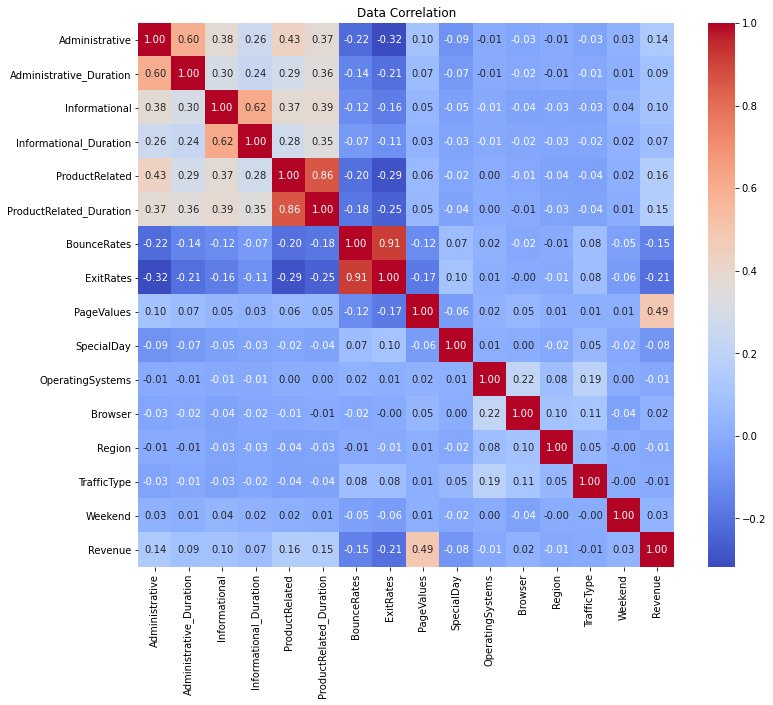

In [3]:
# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

Keterangan:
Label/target: Revenue
Feature yang memiliki korelasi dengan label:

PageValues: kolerasi positif (0.49)
ExitRates: korelasi negatif (-0.21)
ProductRelated: korelasi positif (0.16); mejadi tipe halaman dengan nilai korelasi paling besar
Catatan lainnya:

BounceRates dan ExitRates berkorelasi kuat (0.91), ada kemungkinan redundan
Page_type dan Page_type_duration memiliki korelasi positif yang cukup besar. Secara intuitif, semakin banyak halaman tersebut dibuka, maka akan membutuhkan durasi yang lebih lama.
Berdasarkan gambaran hasil di atas, perlu diperiksa:

Feature yang memiliki korelasi dengan feature target (Revenue)
Feture lainnya yang memiliki korelasi dengan feature (1)
Keterkaitan feature lainnya

# Category Plots

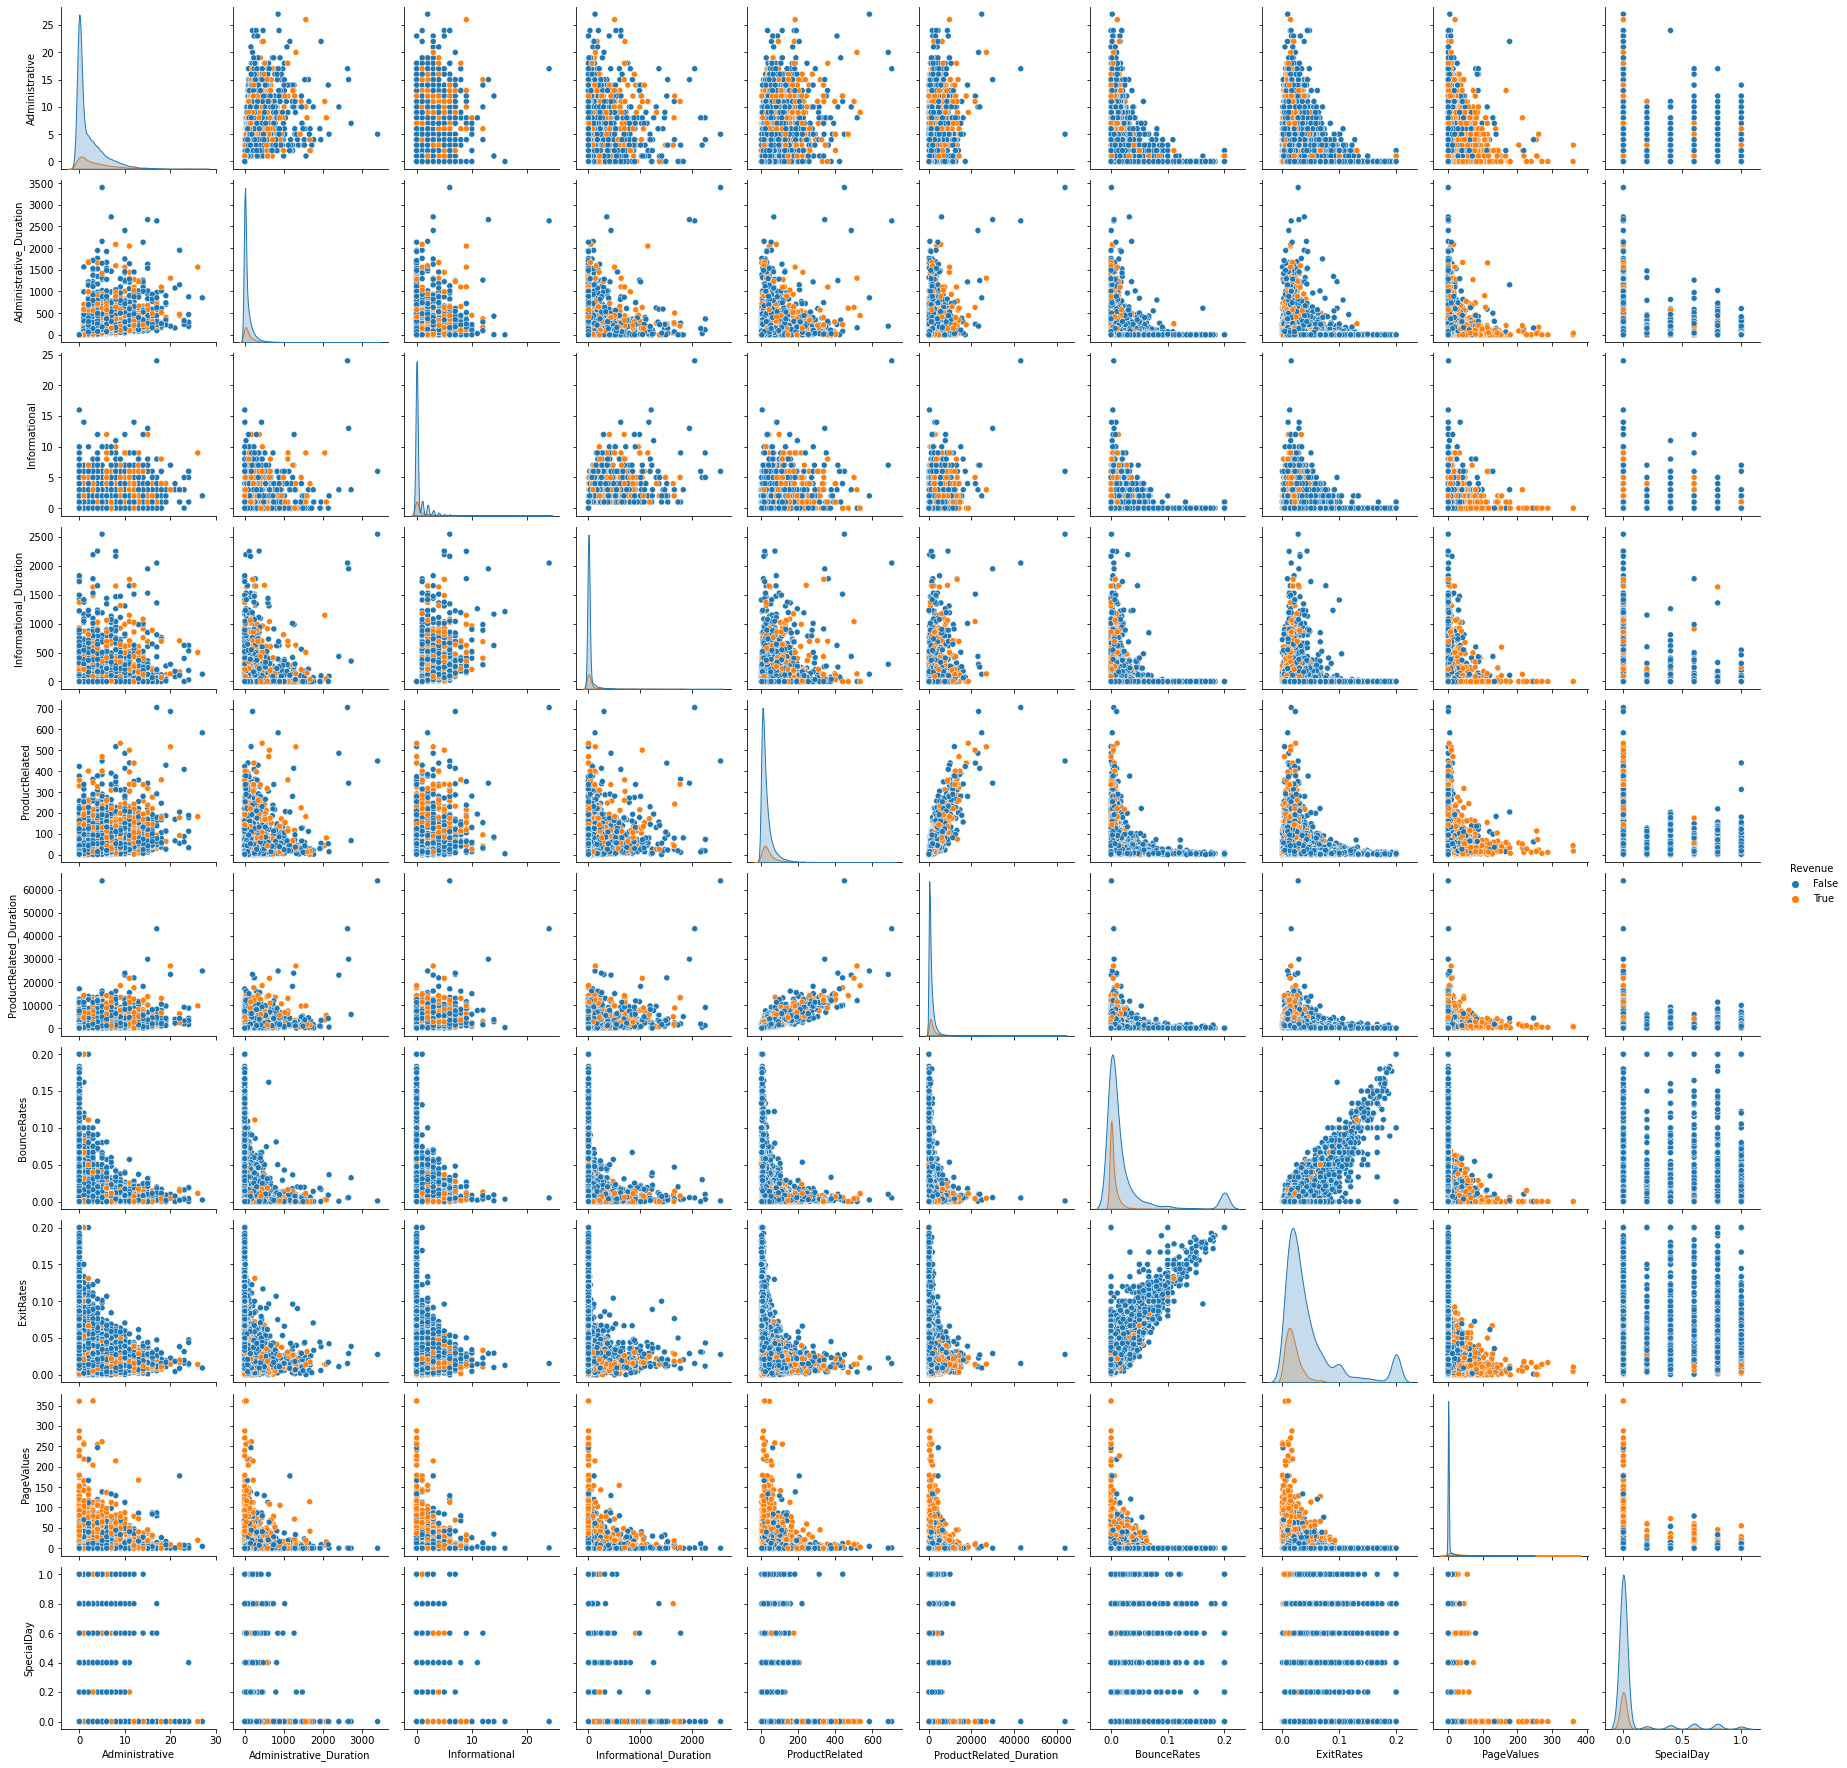

In [4]:
# pair plot dari semua feature
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']

sns.pairplot(df[features], kind = 'scatter', diag_kind = 'kde', hue = 'Revenue')

Terdapat beberapa pola yang menarik:

Feature yang memiliki korelasi dengan feature target (Revenue)

PageValues: terdapat kecenderungan user akan melakukan pembelian pada nilai PageValues yang tinggi.
Exit/Bounce-Rates: terdapat kecenderungan user akan melakukan pembelian saat nilai Exit/Bounce-Rates rendah.
Tidak ada separasi nilai Revenue yang cukup jelas pada scatter plot feature lainnya.
Feature lainnya yang memiliki korelasi dengan feature (1)

Pada scatterplot antara PageValues dan Bounce/Exit-Rates dapat dilihat bahwa user yang melakukan pembelian cenderung berkumpul pada area bawah (nilai PageValues besar, dan nilai Bouce/ExitRates kecil).
Pada nilai SpecialDay 0.0 (jarak SpecialDay dengan waktu kunjungan sangat dekat), nilai PageValues cenderung besar dan user melakukan pembelian.
Feature lainnya

Tidak diperoleh relasi antara type halaman yang mengakibatkan user akan mengunjungi halaman a akibat halaman b atau semisalnya.
Tidak ada kecenderungan seseorang akan melakukan pembelian (Revenue = True) atau tidak berdasarkan tipe dan durasi halaman yang berbeda.

# Feature yang memiliki korelasi dengan feature target (Revenue)

In [5]:
##Boxplot

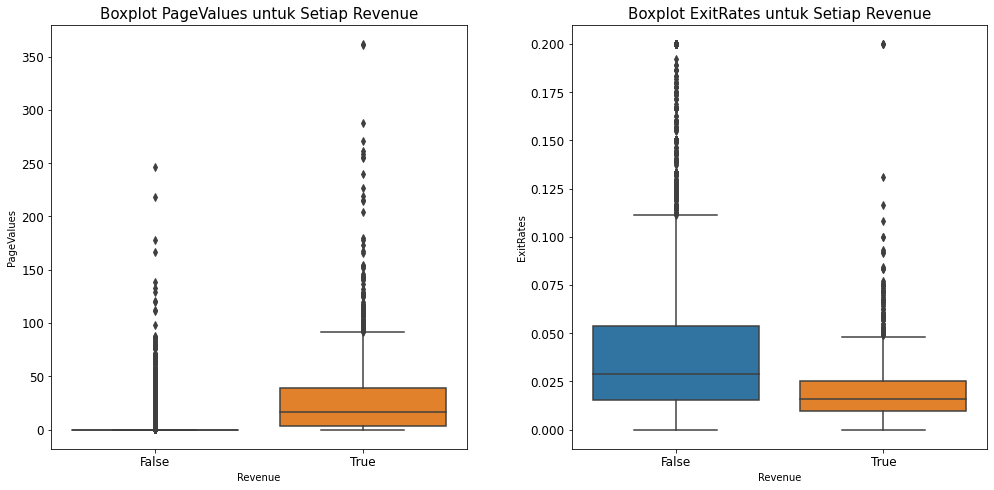

In [18]:
plt.rcParams['figure.figsize'] = 15, 8
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
fig, (ax1, ax2) = plt.subplots(1, 2)

# Box nilai Revenue dan PageValues
ax1.set_title('Boxplot PageValues untuk Setiap Revenue', fontsize = 15)
sns.boxplot(data = df, x = 'Revenue', y = 'PageValues', ax = ax1)

# Boxplot nilai Revenue dan ExitValues
ax2.set_title('Boxplot ExitRates untuk Setiap Revenue', fontsize = 15)
sns.boxplot(data = df, x = 'Revenue', y = 'ExitRates', ax = ax2)

# Boxplot nilai Revenue dan BounceRates
# sns.boxplot(data = df, x = 'Revenue', y = 'BounceRates', ax = ax3)

fig.tight_layout(pad = 5)

User yang melakukan pembelian (Revenue = True) secara garis besar memiliki:

Nilai PageValues yang lebih besar
Nilai ExitRates dan BounceRates yang lebih kecil

## Histogram percentage

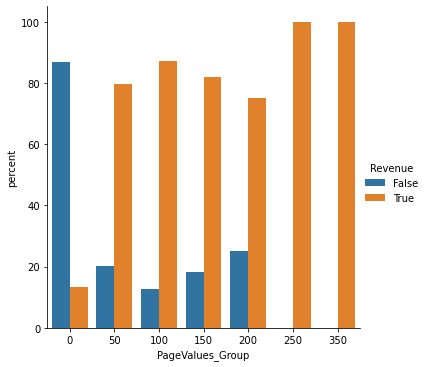

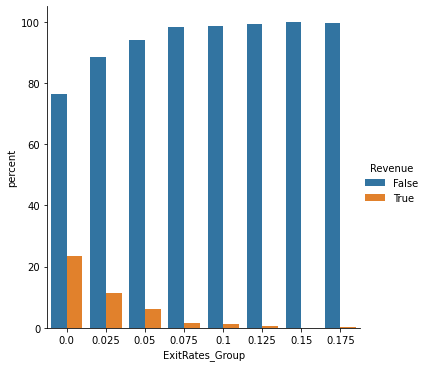

In [7]:
# persentase histogram nilai pagevalues untuk setiap nilai revenue

# split data frame in predifined PageValues groups
def cutPV(df):
    return pd.cut(
        df,[-1, 50, 100, 150, 200, 250, 300, 350, 400], 
        labels=[0, 50, 100, 150, 200, 250, 300, 350])

# split data frame in predifined ExitRates groups
def cutER(df):
    return pd.cut(
        df,[-1, 0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175, 0.201], 
        labels=[0, 0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175])

new_df = df
new_df['PageValues_Group'] = new_df[['PageValues']].apply(cutPV)
new_df['ExitRates_Group'] = new_df[['ExitRates']].apply(cutER)

first = new_df.groupby(['Revenue', 'PageValues_Group']).count().reset_index()
first['Count'] = first['Administrative']
first = first[['Revenue', 'PageValues_Group', 'Count']]

second = new_df.groupby(['Revenue', 'ExitRates_Group']).count().reset_index()
second['Count'] = second['Administrative']
second = second[['Revenue', 'ExitRates_Group', 'Count']]

# (a) PageValues
x, y = 'PageValues_Group', 'Revenue'
(df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.show()

# (b) ExitRates
x, y = 'ExitRates_Group', 'Revenue'
(df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.show()

(a)
Secara keseluruhan, user yang melakukan pembelian (Revenue = True) memiliki nilai PageValues yang besar.

(b)
Persentase user yang melakukan pembelian (Revenue = True) mengalami penurunan seiring dengan adanya peningkatan nilai ExitRates.

[ ]


<AxesSubplot:xlabel='PageValues', ylabel='ExitRates'>

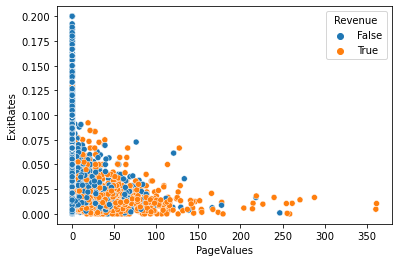

In [8]:
# (c) PageValues dan ExitRates per-Revenue
sns.scatterplot(data = df, x = 'PageValues', y = 'ExitRates', hue = 'Revenue')

User yang melakukan pembelian (Revenue = True) cenderung merupakan user dengan session yang memiliki nilai PageValues yang cukup tinggi, dan nilai ExitRates yang cukup rendah. Hal ini mengakibatkan dots yang mewakilkan user tersebut cenderung berkumpul pada bagian kiri-bawah.



# Feture lainnya yang memiliki korelasi dengan feature (1)

# #Weekend, VisitorType, SpecialDay

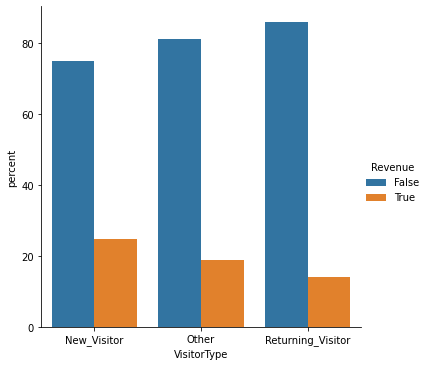

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


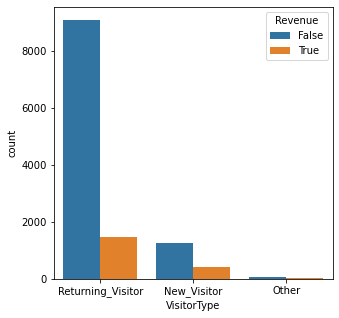

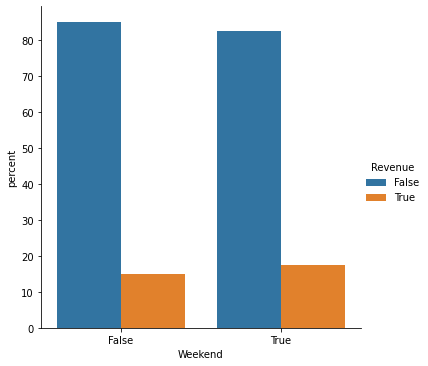

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


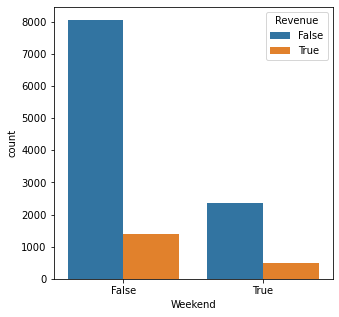

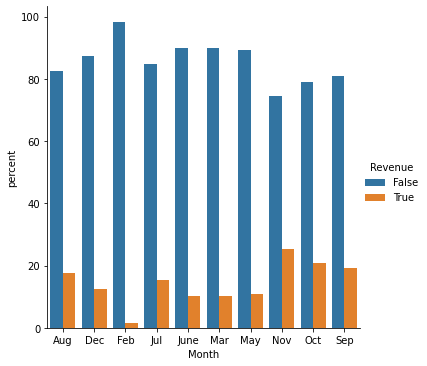

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


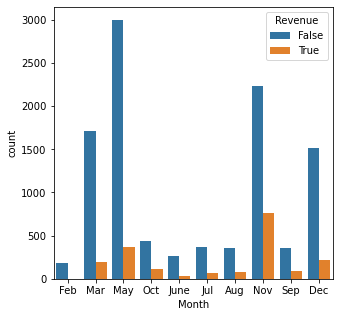

In [5]:
# ViitorType dan Weekend
user = ['VisitorType', 'Weekend', 'Month'] 
y = 'Revenue'

plt.rcParams['figure.figsize'] = 5, 5
for x in user:
  (df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index()
  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
  plt.show()

  sns.countplot(df[x], hue = df['Revenue'])
  plt.show()

VisitorType
 Persentase Revenue = True yang paling besar adalah New_Visitor
 Jumlah user yang paling banyak berkunjung adalah Returning_Visitor
 Cukup banyak Returning_Visitor yang tidak melakukan pembelian

Weekend
Persentase user yang melakukan pembelian cukup seimbang baik di weekday maupun weekend
Jumlah user yang berkunjung pada waktu Weekday lebih besar dibandingkan Weekend

Month
Persentase Revenue = True dari yang paling besar adalah bulan *November*, Oktober, Agustus, September, Juli, baru disusul oleh bulan *Mei*, dan seterusnya
Jumlah user yang berkunjung paling banyak adalah pada bulan Mei dan November

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


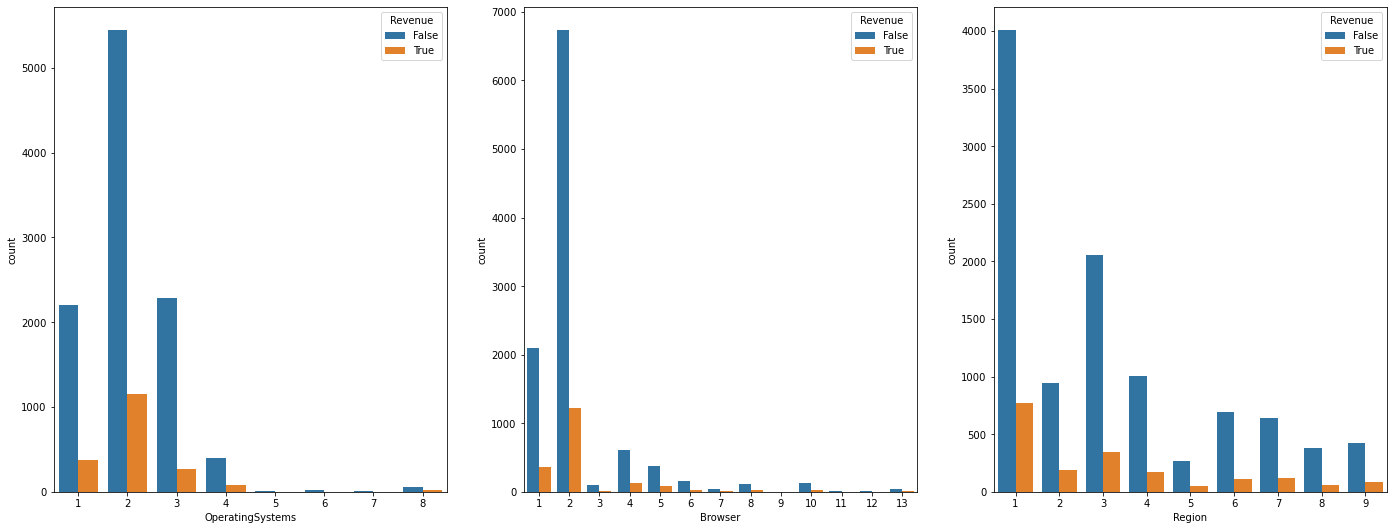

In [7]:
# Visitor Feature: Os, Browser, Region

xs = ['OperatingSystems', 'Browser', 'Region'] 
y = 'Revenue'

plt.rcParams['figure.figsize'] = 20, 8
fig, axs = plt.subplots(1, 3)
for x in xs:
  i = xs.index(x)
  sns.countplot(df[x], hue = df['Revenue'], ax = axs[i])

fig.tight_layout(pad = 3) 

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekend', ylabel='count'>

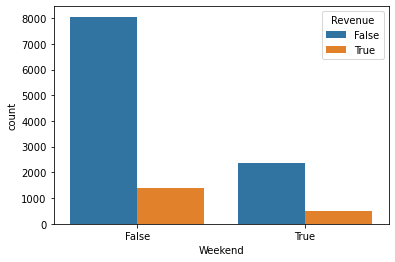

In [9]:
# Persebaran jumlah Revenue per Weekend
sns.countplot(df['Weekend'], hue = df['Revenue'])

Baik user yang hanya mengunjungi halaman ataupun melakukan pembelian lebih banyak dilakukan pada weekday dibandingkan weekend. Hal ini turut dipengaruhi juga oleh banyak hari yang berbeda antara weekday dan weekend.

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VisitorType', ylabel='count'>

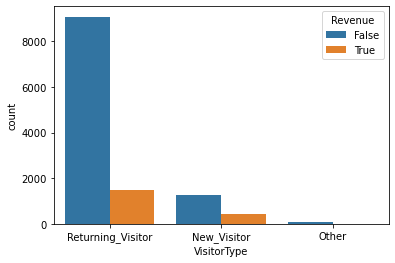

In [10]:
# Persebaran jumlah revenue per visitor type
sns.countplot(df['VisitorType'], hue = df['Revenue'])

User yang datang ataupun datang dan melakukan pembelian yang paling banyak adalah Returning Visitor

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

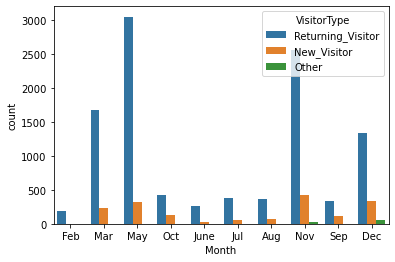

In [11]:
# Persebaran user yang datang setiap bulan berdasarkan Visitor Typenya
sns.countplot(df['Month'], hue = df['VisitorType'])

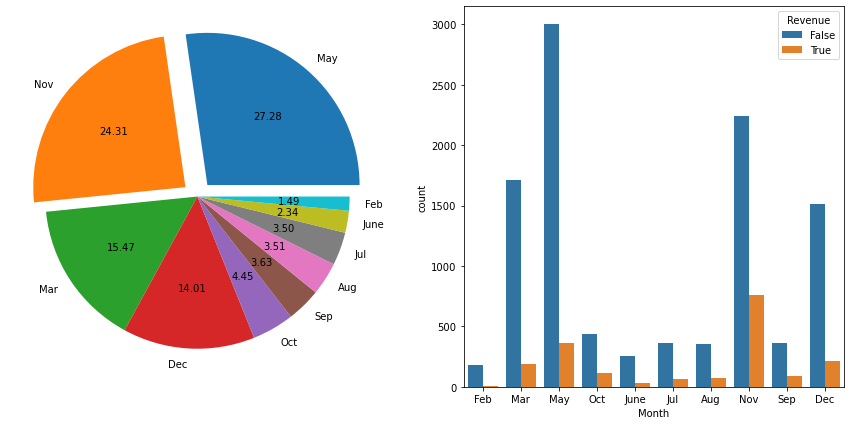

In [12]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)

plt.pie(x = df['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       explode = (0.1,0.1,0,0,0,0,0,0,0,0))

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'Month', hue = 'Revenue')
plt.show()

Secara keseluruhan, user bertipe Returning_Visitor adalah user yang paling banyak melakukan pembelian.
Returning Visitor sendiri paling banyak berkunjung pada bulan May, disusul pada bulan Nov.
Namun user yang melakukan pembelian paling banyak secara kumulatif (dari ketiga jenis Visitor Type-nya) ada pada bulan November.

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

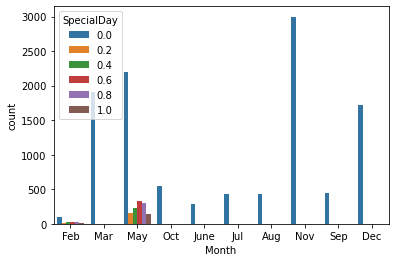

In [13]:
# Persebaran user yang datang setiap bulannya berdasarkan jaraknya ke SpecialDay
sns.countplot(df['Month'], hue = df['SpecialDay'])

## Hubungan antar jenis halaman dan durasi kunjungannya

(0.0, 2000.0)

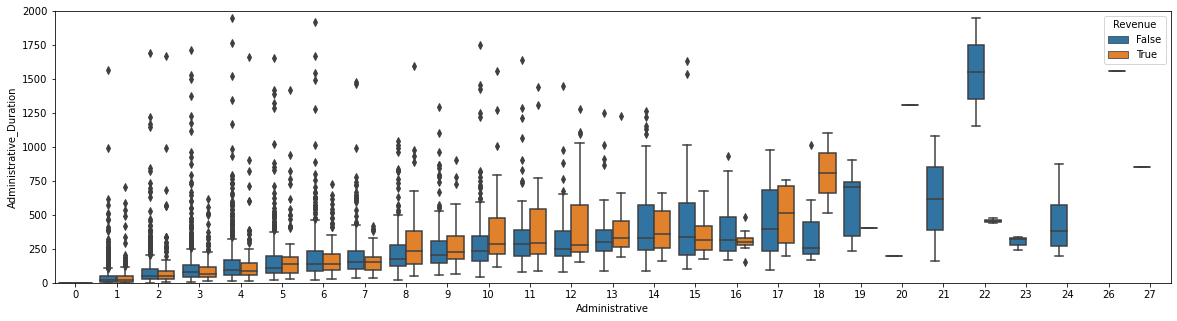

In [14]:
# Administrative pages
plt.figure(figsize = (20, 5))
sns.boxplot(data = df, x = 'Administrative', y = 'Administrative_Duration', hue = 'Revenue')
plt.ylim(0, 2000)

User yang membuka halaman administrative > 19 kali dalam 1 sesi tidak melakukan pembelian.
Semakin sering halaman administrative dibuka, maka durasi yang dibutuhkan cenderung semakin lama.
User yang membuka halaman administrative < 7 kali dalam 1 sesi yang memutuskan untuk membeli cenderung mengunjungi halaman dengan total waktu yang relatif lebih sebentar dibandingkan dengan yang tidak melakukan pembelian.

(0.0, 1800.0)

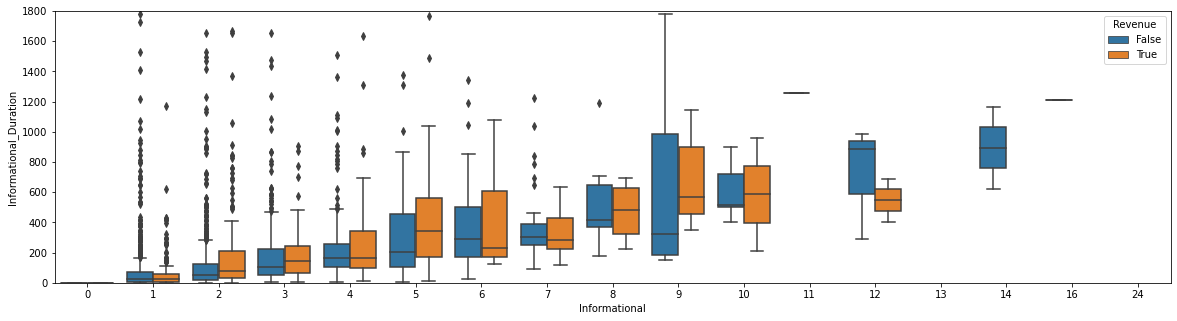

In [16]:
# Informational pages
plt.figure(figsize = (20, 5))
sns.boxplot(data = df, x = 'Informational', y = 'Informational_Duration', hue = 'Revenue')
plt.ylim(0, 1800)

User cenderung menghabiskan waktu lebih lama saat mengunjungi halaman Informational dibandingkan halaman Administrative

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

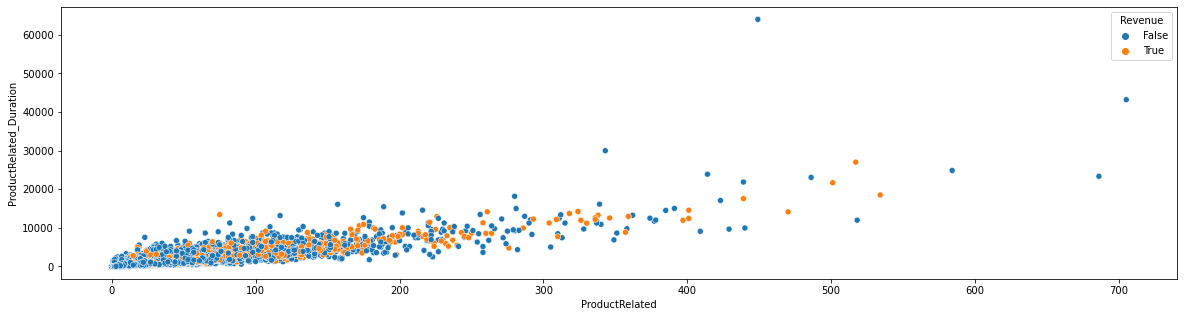

In [17]:
# PageRelated
plt.figure(figsize = (20, 5))
sns.scatterplot(data = df, x = 'ProductRelated', y = 'ProductRelated_Duration', hue = 'Revenue')

User cenderung lebih sering mengunjungi halaman ProductRelated dibandingkan halaman lainnya
Tidak dapat disegmentasi secara langsung apakah user akan melakukan pembelian atau tidak apabila dilihat dari jumlah kunjungan dan durasi pada halaman ProductRelated
